In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Shahidan/Jambu/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Shahidan/Jambu/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/Shahidan/Jambu/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224, 224), classes=['Jambu Air', 'Jambu Batu', 'Jambu Bertih', 'Jambu Bol'], batch_size=20)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['Jambu Air', 'Jambu Batu', 'Jambu Bertih', 'Jambu Bol'], batch_size=20)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224, 224), classes=['Jambu Air', 'Jambu Batu', 'Jambu Bertih', 'Jambu Bol'], batch_size=20, shuffle=False)


Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
#This function will plot images in the form of a grid with 1 row and 20 columns where images are placed

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 20, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

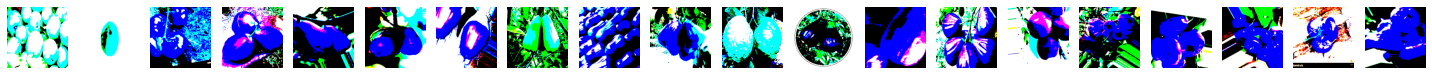

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

Build VGG16 Model

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-4]:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
#Add new classifier model
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation = 'relu')(flat1)
class2 = Dense(1024, activation = 'relu')(class1)
output = Dense(4, activation = 'softmax')(class2)
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Train VGG16 Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
30/30 - 11s - loss: 3.5985 - accuracy: 0.7750 - val_loss: 0.9905 - val_accuracy: 0.9050
Epoch 2/20
30/30 - 4s - loss: 0.2200 - accuracy: 0.9717 - val_loss: 1.5885 - val_accuracy: 0.8850
Epoch 3/20
30/30 - 4s - loss: 0.2122 - accuracy: 0.9833 - val_loss: 0.7500 - val_accuracy: 0.9150
Epoch 4/20
30/30 - 4s - loss: 0.0947 - accuracy: 0.9883 - val_loss: 1.0130 - val_accuracy: 0.9300
Epoch 5/20
30/30 - 4s - loss: 0.0733 - accuracy: 0.9950 - val_loss: 0.6378 - val_accuracy: 0.9500
Epoch 6/20
30/30 - 4s - loss: 0.0252 - accuracy: 0.9983 - val_loss: 0.3621 - val_accuracy: 0.9600
Epoch 7/20
30/30 - 4s - loss: 0.0431 - accuracy: 0.9967 - val_loss: 0.4704 - val_accuracy: 0.9650
Epoch 8/20
30/30 - 4s - loss: 4.1024e-05 - accuracy: 1.0000 - val_loss: 0.5062 - val_accuracy: 0.9550
Epoch 9/20
30/30 - 4s - loss: 3.0941e-05 - accuracy: 1.0000 - val_loss: 0.5184 - val_accuracy: 0.9550
Epoch 10/20
30/30 - 4s - loss: 3.4232e-07 - accuracy: 1.0000 - val_loss: 0.5135 - val_accuracy: 0.9550
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


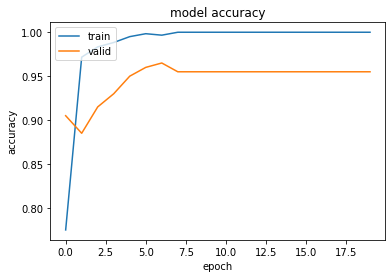

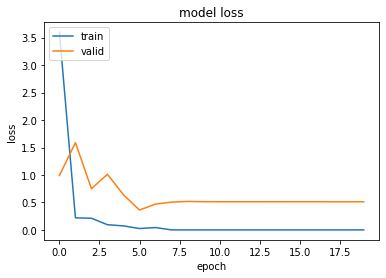

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Predict VGG16 Model

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
predictions

array([[1.00000000e+00, 3.98365931e-14, 1.90182830e-13, 4.15986318e-18],
       [1.00000000e+00, 3.37904667e-31, 2.81761551e-33, 1.03182451e-33],
       [1.00000000e+00, 1.00102842e-08, 3.64151407e-24, 3.96855243e-10],
       [1.00000000e+00, 1.05962755e-17, 1.23641136e-12, 1.19476296e-08],
       [1.00000000e+00, 9.66616607e-21, 1.27726795e-13, 3.62935479e-30],
       [1.00000000e+00, 0.00000000e+00, 6.43534656e-36, 4.64754469e-37],
       [1.00000000e+00, 7.26367045e-19, 3.30354500e-22, 2.58964670e-14],
       [9.99976635e-01, 1.32280480e-11, 9.12183415e-13, 2.33219780e-05],
       [1.00000000e+00, 3.48268483e-21, 3.58969885e-08, 2.35445911e-24],
       [1.00000000e+00, 2.86763765e-17, 9.42181796e-35, 1.17911525e-30],
       [1.00000000e+00, 1.93804267e-22, 2.45489248e-22, 2.96419752e-20],
       [1.00000000e+00, 1.70486805e-18, 4.35896679e-18, 6.28609299e-32],
       [2.87068928e-11, 1.08749960e-08, 5.53799663e-28, 1.00000000e+00],
       [9.99999881e-01, 3.96375897e-16, 2.77758441e

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'Jambu Air': 0, 'Jambu Batu': 1, 'Jambu Bertih': 2, 'Jambu Bol': 3}

Confusion matrix, without normalization
[[46  2  1  1]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


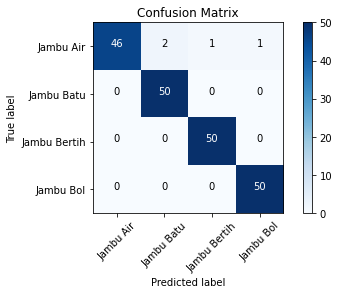

In [ ]:
cm_plot_labels = ['Jambu Air', 'Jambu Batu', 'Jambu Bertih', 'Jambu Bol']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Show a nicely formatted classification report
print(classification_report(test_batches.classes, np.argmax(predictions, axis=-1),target_names=test_batches.class_indices.keys()))

              precision    recall  f1-score   support

   Jambu Air       1.00      0.92      0.96        50
  Jambu Batu       0.96      1.00      0.98        50
Jambu Bertih       0.98      1.00      0.99        50
   Jambu Bol       0.98      1.00      0.99        50

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

